In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

In [62]:
list_of_words = []
end_start = "."
for word in open("./words.txt", mode="r").readlines():
    word = word.replace("\n", "")
    list_of_words.append(word)

In [65]:
alphabet = sorted(list(set("".join(list_of_words))))
end_start = "." # taking same values to reduce number of empty lines
sti = {f"{s}":i+1 for i, s in enumerate(alphabet)}
sti["."] = 0
its = {v: k for k, v in sti.items()}

In [66]:
dict_words = torch.zeros((len(alphabet)+1, len(alphabet)+1), dtype=torch.int32)
for word in list_of_words:
    word = end_start + word + end_start
    for start, end in zip(word, word[1:]):
        dict_words[sti[start], sti[end]] += 1

dict_words += 1 # smotthing results (avoid inf values in loglikelihood)

probabilities = dict_words / torch.sum(dict_words, keepdim=True, dim=1)

(-0.5, 26.5, 26.5, -0.5)

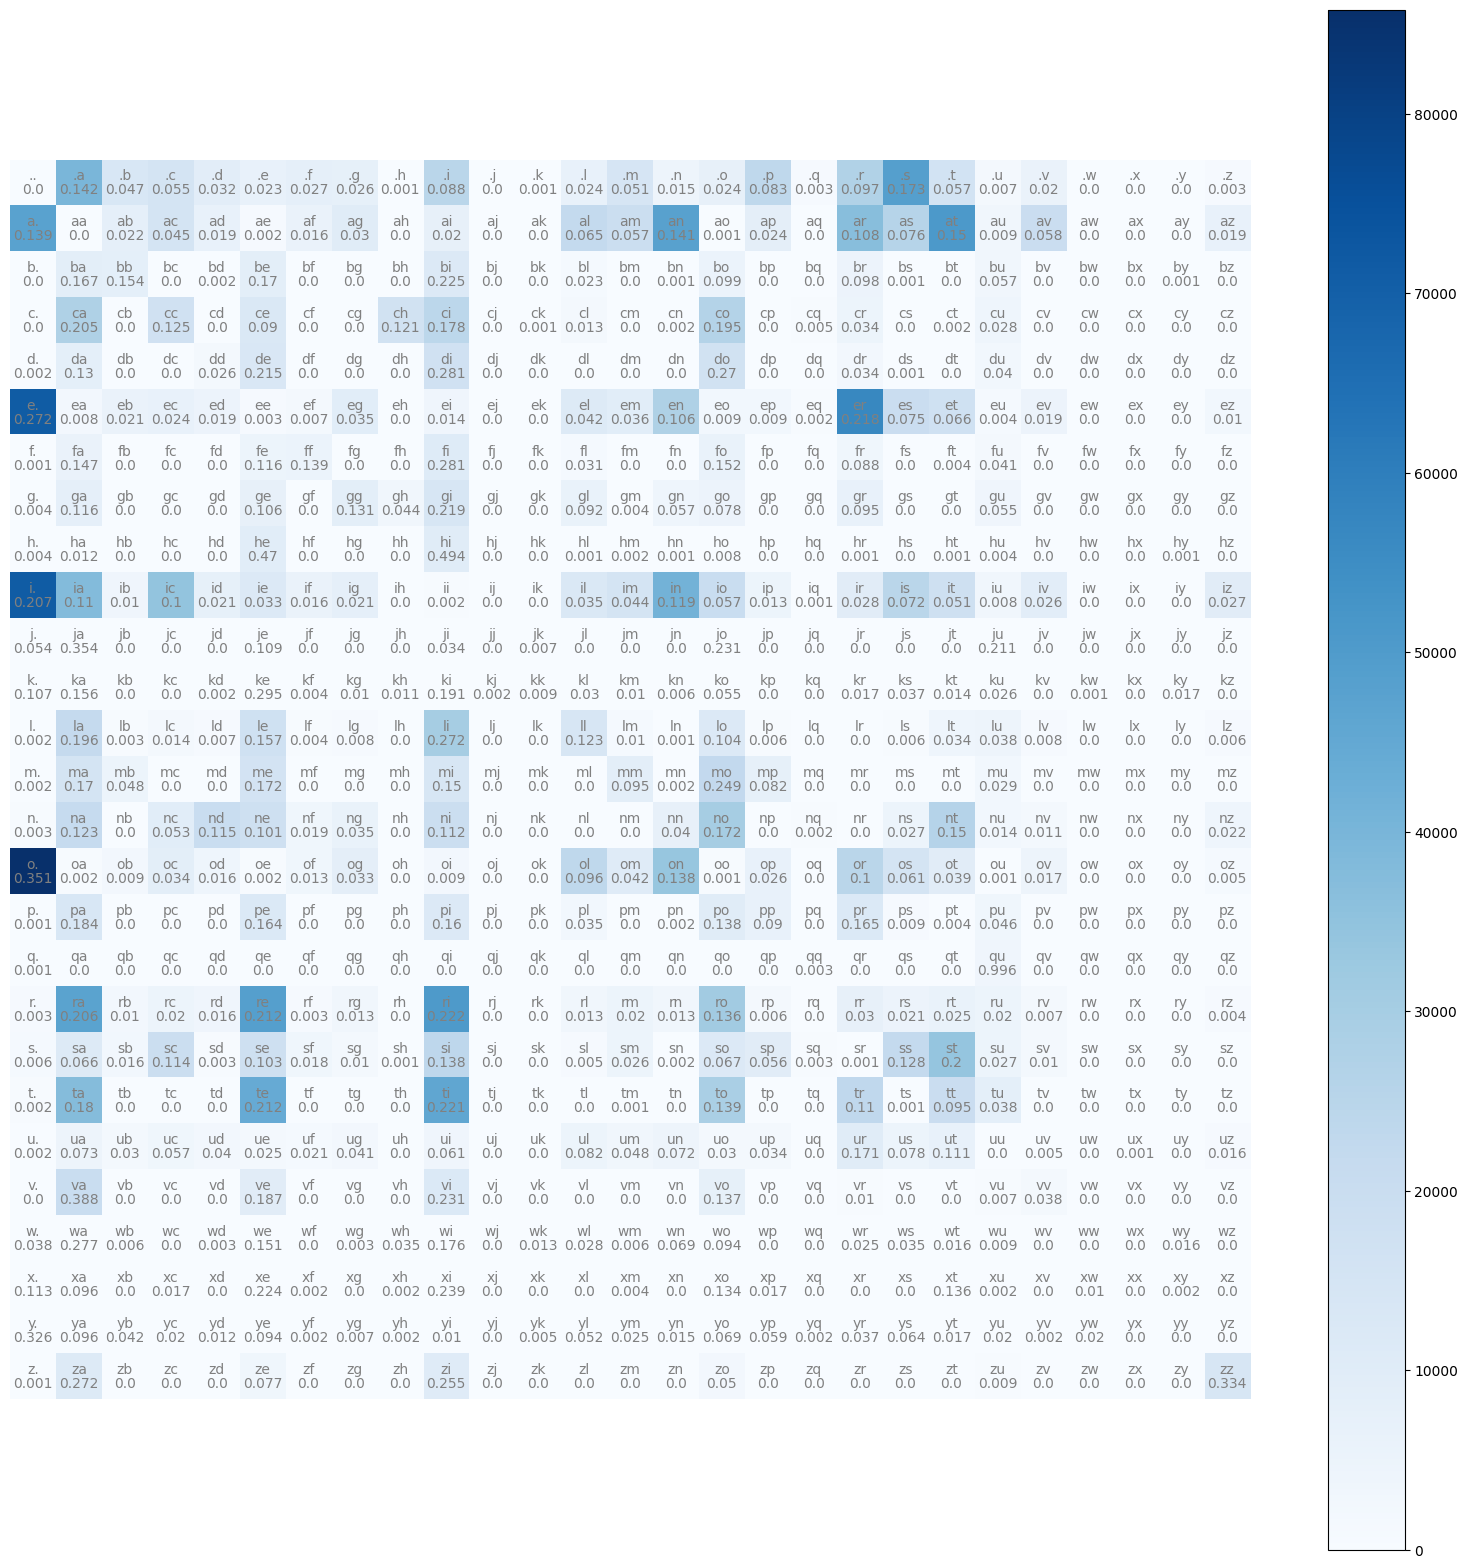

In [78]:
plt.figure(figsize=(20, 20))
plt.imshow(dict_words, cmap="Blues")
plt.colorbar()
for i in range(27):
    for j in range(27):
        chrst = its[i] + its[j]
        plt.text(j, i, chrst, ha="center", va="bottom", color="gray")
        plt.text(j, i, round(probabilities[i, j].item(), 3), ha="center", va="top", color="gray")
plt.axis("off")

In [101]:
gen = torch.Generator().manual_seed(42)
for _ in range(10):
    ix = 0
    out = []
    while True:
        p = probabilities[ix, :]
        res = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
        ch = its[res]
        out.append(ch)
        ix = res
        if ix == 0:
            break

In [102]:
# model evaluation => max loglikelihood
log_likelihood = 0
n = 0
for word in list_of_words:
    word = end_start + word + end_start
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = sti[ch1]
        ix2 = sti[ch2]
        p = probabilities[ix1, ix2]
        log_prob = torch.log(p)
        log_likelihood += log_prob
        n+=1
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")
        
        


log_likelihood=tensor(-6932695.)
nll=tensor(6932695.)
2.2754125595092773
